# Advanced Sympy Python programming
# This tutorial will systematically introduce you to new ways to solve specific calculus and Algrebraic problems in Python
# For each new function make sure you read the help and work through the examples, explained in the help. 
# This note book is guide and focus your attention onto aspects important for this course. 


## Differentiating symbolically
## sympy.diff

In [2]:
import sympy # Step 1: import sympy module 
from IPython.display import display
x, x1, x2, x3, x4, y, y1, y2 = sympy.symbols('x x1 x2 x3 x4 y y1 y2') # Step 2: define the symbols
y = sympy.log(x)*sympy.sin(x) # Step 3: write an expression(s) using the symbols
dydx = sympy.diff(y,x)

#sympy.pretty_print(dydx)
display(dydx)

log(x)*cos(x) + sin(x)/x

## Computing gradients symbolically
## sympy.derive_by_array

In [3]:
# find the gradinets (partial derivatives) of a list of expressions

import sympy # Step 1: import sympy module 
from IPython.display import display
x, x1, x2, x3, x4, y, y1, y2 = sympy.symbols('x x1 x2 x3 x4 y y1 y2') # # Step 2: define the symbols

y1 = x1*x2*x3 # St|ep 3: write an expression(s) using the symbols
y2 = x1**2*x2**2*x3**2
display(y1)
display(y2)

y = [y1, y2]
x = [x1, x2, x3]
dydx = sympy.derive_by_array(y,x) # 3 by 2 matrix: #rows = the length of x, #cols = the length of y
print(y)
print(x)
display(dydx)

x1*x2*x3

x1**2*x2**2*x3**2

[x1*x2*x3, x1**2*x2**2*x3**2]
[x1, x2, x3]


[[x2*x3, 2*x1*x2**2*x3**2], [x1*x3, 2*x1**2*x2*x3**2], [x1*x2, 2*x1**2*x2**2*x3]]

## Concentrating on objects types - Each object has different methods
### $\begin{bmatrix}\dfrac{dy_{1}}{dx_{1}} & \dfrac{dy_{2}}{dx_{1}} \\ \dfrac{dy_{1}}{dx_{2}} & \dfrac{dy_{2}}{dx_{2}}\\ \dfrac{dy_{1}}{dx_{3}} & \dfrac{dy_{2}}{dx_{3}} \end{bmatrix}$

## type()



In [4]:
#sympy.pretty_print(dydx)
print(type(dydx))# <class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>
display(dydx)

<class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


[[x2*x3, 2*x1*x2**2*x3**2], [x1*x3, 2*x1**2*x2*x3**2], [x1*x2, 2*x1**2*x2**2*x3]]

## Matrix-matrix multiplication

### sympy.Matrix for matrix multiplication
### tomatrix(): sympy.Array -> sympy.Matrix

In [5]:
sympy.pretty_print(dydx) # 3 by 2 sympy array
print(type(dydx))# <class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>
dydx_matrix = dydx.tomatrix()
sympy.pretty_print(dydx_matrix)
print(type(dydx_matrix)) # <class 'sympy.matrices.dense.MutableDenseMatrix'>

⎡              2   2⎤
⎢x₂⋅x₃  2⋅x₁⋅x₂ ⋅x₃ ⎥
⎢                   ⎥
⎢           2      2⎥
⎢x₁⋅x₃  2⋅x₁ ⋅x₂⋅x₃ ⎥
⎢                   ⎥
⎢           2   2   ⎥
⎣x₁⋅x₂  2⋅x₁ ⋅x₂ ⋅x₃⎦
<class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>
⎡              2   2⎤
⎢x₂⋅x₃  2⋅x₁⋅x₂ ⋅x₃ ⎥
⎢                   ⎥
⎢           2      2⎥
⎢x₁⋅x₃  2⋅x₁ ⋅x₂⋅x₃ ⎥
⎢                   ⎥
⎢           2   2   ⎥
⎣x₁⋅x₂  2⋅x₁ ⋅x₂ ⋅x₃⎦
<class 'sympy.matrices.dense.MutableDenseMatrix'>


In [6]:
display(dydx) # 3 by 2 sympy array
display(dydx_matrix)

[[x2*x3, 2*x1*x2**2*x3**2], [x1*x3, 2*x1**2*x2*x3**2], [x1*x2, 2*x1**2*x2**2*x3]]

Matrix([
[x2*x3, 2*x1*x2**2*x3**2],
[x1*x3, 2*x1**2*x2*x3**2],
[x1*x2, 2*x1**2*x2**2*x3]])

In [7]:
print('dydx = ',dydx_matrix)
A = sympy.Matrix([[5,5],[y1,y2]])
print('A = ',A)
display(dydx_matrix)
display(A)
B = dydx_matrix*A
display(B)
display(B.T) # or sympy.transpose(B) 

dydx =  Matrix([[x2*x3, 2*x1*x2**2*x3**2], [x1*x3, 2*x1**2*x2*x3**2], [x1*x2, 2*x1**2*x2**2*x3]])
A =  Matrix([[5, 5], [x1*x2*x3, x1**2*x2**2*x3**2]])


Matrix([
[x2*x3, 2*x1*x2**2*x3**2],
[x1*x3, 2*x1**2*x2*x3**2],
[x1*x2, 2*x1**2*x2**2*x3]])

Matrix([
[       5,                 5],
[x1*x2*x3, x1**2*x2**2*x3**2]])

Matrix([
[2*x1**2*x2**3*x3**3 + 5*x2*x3, 2*x1**3*x2**4*x3**4 + 5*x2*x3],
[2*x1**3*x2**2*x3**3 + 5*x1*x3, 2*x1**4*x2**3*x3**4 + 5*x1*x3],
[2*x1**3*x2**3*x3**2 + 5*x1*x2, 2*x1**4*x2**4*x3**3 + 5*x1*x2]])

Matrix([
[2*x1**2*x2**3*x3**3 + 5*x2*x3, 2*x1**3*x2**2*x3**3 + 5*x1*x3, 2*x1**3*x2**3*x3**2 + 5*x1*x2],
[2*x1**3*x2**4*x3**4 + 5*x2*x3, 2*x1**4*x2**3*x3**4 + 5*x1*x3, 2*x1**4*x2**4*x3**3 + 5*x1*x2]])

## Solve linear systems in Python
## Linear solver in sympy -> sympy.linsolve
## Unique solutions
### $2a + b = 4$
### $2b + c = 5$
### $-c + a = -2$ 

### $\begin{bmatrix} 2 & 1 & 0 \\ 0 & 2 & 1 \\ 1 & 0 & -1 \end{bmatrix}\begin{bmatrix} a\\ b\\c \end{bmatrix}= \begin{bmatrix} 4\\5\\-2 \end{bmatrix}$

In [8]:
a, b, c = sympy.symbols('a, b, c')
A = sympy.Matrix([[6,5,2],[10,2,7],[6,6,-6]])
x = sympy.Matrix([8,2,-2])
answer = sympy.linsolve((A,x),[a,b,c])
print(answer)
print(type(answer))

print(list(answer))
print(type(list(answer)))

print(list(answer)[0])
print(type(list(answer)[0]))

print(list(answer)[0][1])

print(type(list(answer)[0][1]))

FiniteSet((-205/141, 382/141, 224/141))
<class 'sympy.sets.sets.FiniteSet'>
[(-205/141, 382/141, 224/141)]
<class 'list'>
(-205/141, 382/141, 224/141)
<class 'sympy.core.containers.Tuple'>
382/141
<class 'sympy.core.numbers.Rational'>


## Underdetermined system of equations
## Infinitely many solutions
### $2a + b = 4$
### $2b + c = 5$

### $\begin{bmatrix} 2 & 1 & 0 \\ 0 & 2 & 1 \end{bmatrix}\begin{bmatrix} a\\ b\\c \end{bmatrix}= \begin{bmatrix} 4\\5 \end{bmatrix}$

In [9]:
# Parametric Solution when the system is underdetermined.
a, b, c = sympy.symbols('a, b, c')
A = sympy.Matrix([[4,5,3],[2,2,0]])
x = sympy.Matrix([4,5])
answer = sympy.linsolve((A,x),[a,b,c])
print(answer)

FiniteSet((3*c + 17/2, -3*c - 6, c))


## Solving linear parametric systems of equations to obain a parametric solution
### $(e+f)a + (f)b = 4$
### $(2f^{2})b + (e/f)c = 5$
### $(f-e)c + (f)a = -2$ 

### $\begin{bmatrix} (e+f) & (f) & 0 \\ 0 & (2f^{2}) & (e/f) \\ (f) & 0 & (f-e) \end{bmatrix}\begin{bmatrix} a\\ b\\c \end{bmatrix}= \begin{bmatrix} 4\\5\\-2 \end{bmatrix}$

In [10]:
a, b, c,e, f = sympy.symbols('a, b, c, e, f')
A = sympy.Matrix([[(e+2*f),f,e],[e,2*f**2,e/f],[f,e,f-e]])
x = sympy.Matrix([4,5,-2])
answer = sympy.linsolve((A,x),[a,b,c])
display(answer)

FiniteSet(((5*e**2*f - 4*e**2 - 4*e*f**3 + 5*e*f**2 - 2*e*f + 8*f**4 - 5*f**3)/(e**3*f - e**3 - 2*e**2*f**3 + e**2*f**2 - 2*e**2*f - 4*e*f**4 - e*f**3 + e*f**2 + 4*f**5), (-3*e**2*f + 2*e**2 - 14*e*f**2 + 8*e*f + 10*f**3)/(e**3*f - e**3 - 2*e**2*f**3 + e**2*f**2 - 2*e**2*f - 4*e*f**4 - e*f**3 + e*f**2 + 4*f**5), (-e**2*f - 4*e*f**3 - 8*e*f**2 - 16*f**4 + 5*f**3)/(e**3*f - e**3 - 2*e**2*f**3 + e**2*f**2 - 2*e**2*f - 4*e*f**4 - e*f**3 + e*f**2 + 4*f**5)))

## Solving nonlinear equations
## sympy.solvers.solve ()

In [12]:
from sympy.solvers import solve
x, y = sympy.symbols('x y') 
y = x**3 + 5
display(y)
print(solve(y,x))
print(solve(y))
print(solve(y,x, dict = True))

x**3 + 5

[-5**(1/3), 5**(1/3)/2 - sqrt(3)*5**(1/3)*I/2, 5**(1/3)/2 + sqrt(3)*5**(1/3)*I/2]
[-5**(1/3), 5**(1/3)/2 - sqrt(3)*5**(1/3)*I/2, 5**(1/3)/2 + sqrt(3)*5**(1/3)*I/2]
[{x: -5**(1/3)}, {x: 5**(1/3)/2 - sqrt(3)*5**(1/3)*I/2}, {x: 5**(1/3)/2 + sqrt(3)*5**(1/3)*I/2}]


## Integration for indefinite and definite integrals
## sympy.integrate: 1) indefinite integral, 2) definite integral

In [17]:
from sympy import E
x1,x2, y = sympy.symbols('x1 x2 y') 

y = E**(-x1**2)
#y = x1**2+x1*x2
# Indefinite integral (without limits)
print(sympy.integrate(y,x1))
# Definite integral
print(sympy.integrate(y,(x1,-2,4)))

sqrt(pi)*erf(x1)/2
sqrt(pi)*erf(2)/2 + sqrt(pi)*erf(4)/2


# Advanced plotting

## Plotting scalar fields
## Important for this course to understand and visualize scalar quantities computed for a structure e.g. Von Mises stress

[-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]
[[-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]
 [-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
 [25. 25. 25. 25. 25. 2

<IPython.core.display.Javascript object>


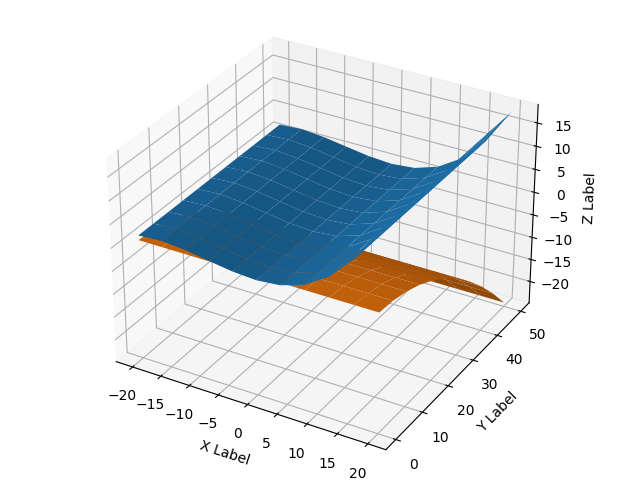

C:\Users\ebers\AppData\Local\Temp/ipykernel_1176/2489393914.py:25: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<IPython.core.display.Javascript object>


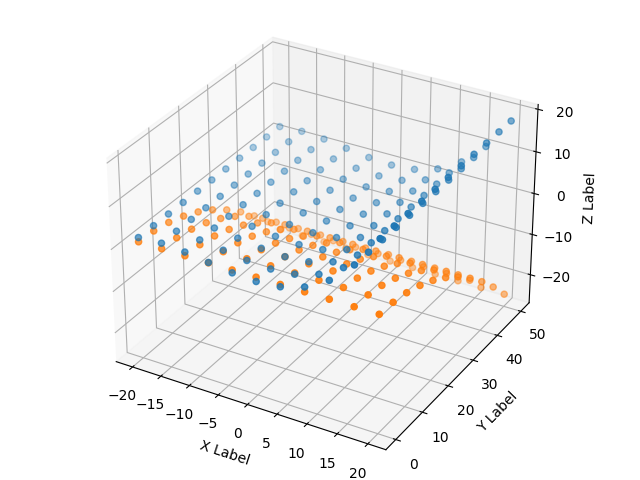

C:\Users\ebers\AppData\Local\Temp/ipykernel_1176/2489393914.py:36: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [21]:
import matplotlib.pyplot as plt
from numpy import meshgrid, linspace
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

x = linspace(-20,20,11)
y = linspace(0,50,11)

print(x)
print(y)

X,Y = meshgrid(x,y)

print(X)
print(Y)

UX = (Y+X**2*(X+25))*1E-3
UY = -Y**2*1E-2 + 1E-0

#UX = (X+Y*(Y+25))*1E-3


fig = plt.figure(1)

ax = Axes3D(fig)
ax.plot_surface(X,Y,UX)
ax.plot_surface(X,Y,UY)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


fig = plt.figure(2)

ax = Axes3D(fig)
ax.scatter(X,Y,UX)
ax.scatter(X,Y,UY)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()



<IPython.core.display.Javascript object>


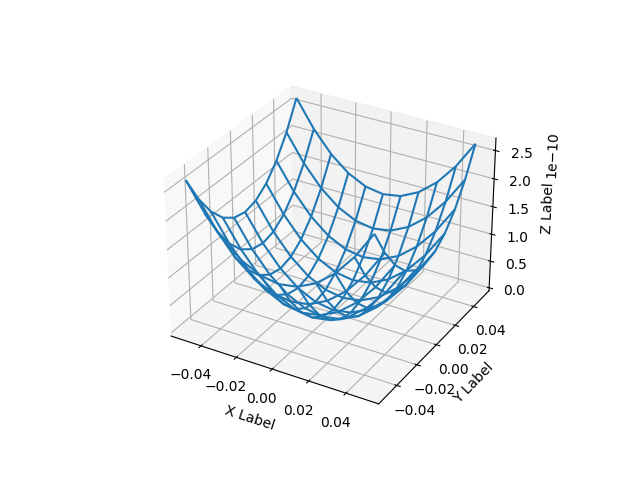

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


rho = 7600; g = 9.81; nu = 0.3; E = 210E9; W = 0.1; B = 0.1; H = 100
uz = lambda x,y,z: rho*g*z**2/(2*E) + nu*rho*g*(x**2+y**2)/(2*E) - rho*g*H**2/(2*E)

x = linspace(-0.05,0.05,11)
y = linspace(-0.05,0.05,11)

X,Y = meshgrid(x,y)

UZ = uz(X,Y,H)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.plot_wireframe(X,Y,UZ)
plt.show()

# Plotting Vector fields
## Important for this course to understand and visualize the displacement field of a structure

<IPython.core.display.Javascript object>


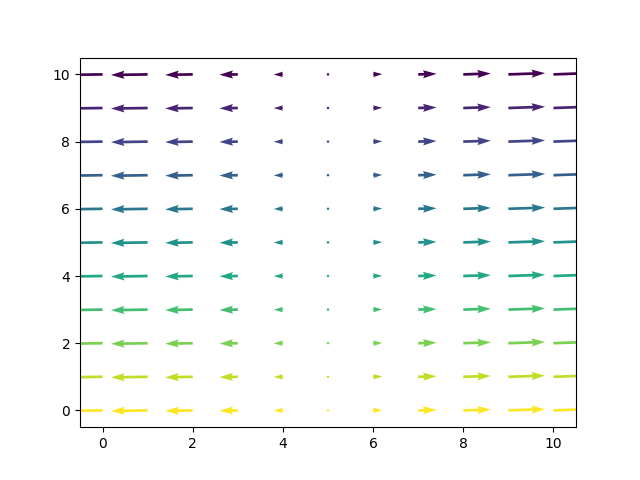

In [23]:
from numpy import meshgrid, linspace
from matplotlib.pyplot import quiver, show
%matplotlib notebook


x = linspace(-10,10,11)
y = linspace(0,10,11)

X,Y = meshgrid(x,y)

UX = (Y+X*(X+25))*1E-3
UY = -Y*1E-2

quiver(X,UX,UY)
show()

In [22]:
#print(E)

210000000000.0
